## Overlay Web Map Service (WMS) on an interactive leaflet map using folium

In [ ]:
from IPython.display import HTML
import folium
import numpy as np 
from matplotlib import pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
def inline_map(map):
    """
    Embeds the HTML source of the map directly into the IPython notebook.
    
    This method will not work if the map depends on any files (json data). Also this uses
    the HTML5 srcdoc attribute, which may not be supported in all browsers.
    """
    map._build_map()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 450px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))

def embed_map(map, path="map.html"):
    """
    Embeds a linked iframe to the map into the IPython notebook.
    
    Note: this method will not capture the source of the map into the notebook.
    This method should work for all maps (as long as they use relative urls).
    """
    map.create_map(path=path)
    return HTML('<iframe src="files/{path}" style="width: 100%; height: 450px; border: 3"></iframe>'.format(path=path))

#### WMS url

###### topo basemap: crs=EPSG:27200&dpiMode=7&format=image/png&layers=topobasemap&styles=&url=http://maps.scinfo.org.nz/basemaps/wms

https://data.linz.govt.nz/services;key=YOUR_API_TOKEN/wms?service=WMS&version=1.1.1&request=GetCapabilities

Click on legend button to check the given WMS layer.
Min/max longitude specified while defining folium map to see Chatham Islands, New Zealand.

In [ ]:
map = folium.Map(width=900,height=450,location=[-41.25, 179], zoom_start=5,min_lon=0, max_lon=360 )

map.circle_marker(location=[-42.400, 173.677], popup="KAIKOURA, New Zealand", fill_color='#FF0000',\
                  line_color=None, radius=20000)

map.add_wms_layer(wms_name="All NZ Topographic Baselayers",
                 wms_url="http://maps.scinfo.org.nz/basemaps/wms",
                 wms_format="image/png",
                 wms_layers='topobasemap')
map.add_wms_layer(wms_name="GMRT",
                wms_url="http://gmrt.marine-geo.org/cgi-bin/mapserv?map=/public/mgg/web/gmrt.marine-geo.org/htdocs/services/map/wms_merc.map",
                wms_format="image/png",
                wms_layers='topo')
map.add_layers_to_map()
inline_map(map)

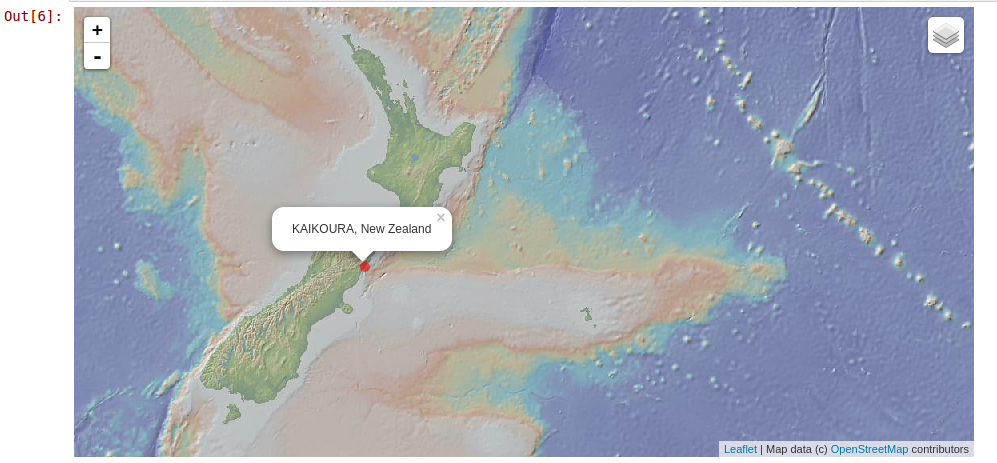

In [6]:
from IPython.display import Image
Image(filename='/home/paul/Pictures/gmrt_map.png') 